# Assignment #4, Heart Disease in more detail
### deadline July 03, 11:59 PM

In the last assingment, you did a basic analysis of the heart disease. Lets do a more detailed analysis of it. We have another heart disease dataset with 76 featuers. Usually, more features mean more information. Probably, we will be able to achieve better classification accuracy. Do all features give better  prediction? Or, can we ignore some of the features to achieve better accuracy. How many features give us the best classification accuracy? Which model works best with the optimized set of features? Which hypermeters are best for each model we choose? These are some of the questions that intrigue us. You have to explore these questions and come up with reasonable answers. You will submit your notebook with all the working. Your grading will be done on the level of detail and best answers you achieve.

The data is present at [UCI machine learning data set](http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data). Some detail about the data is present at [link](http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names).

I will recommend to read Chapter 4 of 'Introduction to machine learning using Python' book by Andreas C Mueller. It notebook can be found at [link](https://github.com/amueller/introduction_to_ml_with_python)

In [1]:
import numpy as np
from urllib.request import urlopen
import urllib
import matplotlib.pyplot as plt # Visuals
import seaborn as sns 
import sklearn as skl
import pandas as pd
import os
from sklearn.cross_validation import train_test_split # Create training and test sets
from sklearn.neighbors import KNeighborsClassifier # Kth Nearest Neighbor
from sklearn.tree import DecisionTreeClassifier # Decision Trees
from sklearn.tree import export_graphviz # Extract Decision Tree visual
from sklearn.tree import tree 
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn import svm #SVM
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # AUC 
from sklearn.model_selection import KFold#cross validation 
# from sklearn import cross_validation  #cross validation 

c:\users\hassaan aslam\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%cd ~D:/University/8th semester/Data science/assingment/data


cols = ["id","ccf","age", "sex","painloc", "painexer","relrest","relrest ","cp", "trestbp", "htn", "chol","smoke", "cigs",
        "years", "fbs", "dm", "famhist", "restecg","ekgmo", "ekgday", "ekgyr","dig", "prop", "nitr", "pro", "diuretic", "proto",
        "thaldur","thaltime","met", "thalach","thalrest","tpeakbps","tpeakbpd","dummy","trestbpd","exang","xhypo","oldpeak",
        "slope","rldv5","rldv5e","ca","restckm","exerckm","restef","restwm","exeref","exerwm","thal","thalsev","thalpul",
        "earlobe","cmo","cday","cyr","num","lmt","ladprox","laddist","diag","cxmain","ramus","om1","om2","rcaprox","rcadist",
        "lvx1","lvx2","lvx3","lvx4","lvf","cathef","junk","Name"]	
data=[]
path = 'D:/University/8th semester/Data science/assingment/data'
files = [f for f in os.listdir(path) if os.path.isfile(f)]

count=0
old=""

sub="name"
for f in files:
  with open (f, "r", encoding="ISO-8859-1") as myfile:
    for line in myfile:  
        line = line.replace('\n',' ')
        if line.find("name")==-1:
                old+=line
                count+=1                
        else:                             #if name found then new row starts and the row is splited to sperate values
            if count<2573:
                old+=line
                old=old.split()                
                data.append(old)   
                old=""
                
          
        
df = pd.DataFrame(data,columns=cols)
display(df)
# pd.get_dummies(df)


D:\University\8th semester\Data science\assingment\data


,id,ccf,age,sex,painloc,painexer,relrest,relrest,cp,trestbp,...,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,Name
0,1,0,63,1,-9,-9,-9,-9,1,145,...,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,...,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,...,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,...,1,1,1,1,1,1,1,-9,-9,name
5,7,0,56,1,-9,-9,-9,-9,2,120,...,1,1,1,1,1,1,1,-9,-9,name
6,8,0,62,0,-9,-9,-9,-9,4,140,...,2,1,1,1,1,7,1,-9,-9,name
7,9,0,57,0,-9,-9,-9,-9,4,120,...,1,1,1,1,1,1,1,-9,-9,name
8,10,0,63,1,-9,-9,-9,-9,4,130,...,2,1,1,1,6,7,2,-9,-9,name
9,11,0,53,1,-9,-9,-9,-9,4,140,...,2,1,1,1,1,1,1,-9,-9,name


In [3]:
# df[df=="-9"] = np.nan
df = df.loc[:, (df != "-9").any(axis=0)]

In [40]:
# df.dtypes
heartDisease=df
# display(heartDisease.head())
for item in heartDisease: #converts everything to floats
    if(item != "Name"):
        heartDisease[item] = pd.to_numeric(heartDisease[item])

def normalize(heartDisease, toNormalize): #normalizes 
    result = heartDisease.copy()
    for item in heartDisease.columns:
        if (item in toNormalize):
            
            max_value = heartDisease[item].max()
            min_value = heartDisease[item].min()
            result[item] = (heartDisease[item] - min_value) / (max_value - min_value)
    return result
toNormalize = ["age", "cp", "trestbps", "chol", "thalach", "oldpeak","cigs", "years","dig"] #columns to normalize

heartDisease = normalize(heartDisease, toNormalize)
heartDisease = heartDisease.dropna()

for i in range(1,5):
    heartDisease['num'] = heartDisease['num'].replace(i,1)
    
heartDisease.head()
del heartDisease['Name']
heartDisease.columns

Index(['id', 'ccf', 'age', 'sex', 'cp', 'trestbp', 'htn', 'chol', 'cigs',
       'years', 'fbs', 'dm', 'famhist', 'restecg', 'ekgmo', 'ekgday', 'ekgyr',
       'dig', 'prop', 'nitr', 'pro', 'diuretic', 'proto', 'thaldur',
       'thaltime', 'met', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd',
       'dummy', 'trestbpd', 'exang', 'xhypo', 'oldpeak', 'slope', 'rldv5e',
       'ca', 'thal', 'cmo', 'cday', 'cyr', 'num', 'lmt', 'ladprox', 'laddist',
       'cxmain', 'om1', 'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4',
       'lvf'],
      dtype='object')

In [30]:

train, test = train_test_split(heartDisease, test_size = 0.20, random_state = 42)
# Create the training test omitting the diagnosis

training_set = train.loc[:, train.columns != 'num']
# Next we create the class set 
class_set = train.loc[:, train.columns == 'num']


# Next we create the test set doing the same process as the training set
test_set = test.loc[:, test.columns != 'num']
test_class_set = test.loc[:, test.columns == 'num']

In [41]:
data=heartDisease["num"]

del heartDisease["num"]

from sklearn.feature_selection import SelectPercentile
X_train, X_test, y_train, y_test = train_test_split( heartDisease, data, random_state=0, test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (141, 54)
X_train_selected.shape: (141, 27)


c:\users\hassaan aslam\appdata\local\programs\python\python35\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 1 22 49 50] are constant.
  UserWarning)
c:\users\hassaan aslam\appdata\local\programs\python\python35\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


##### After uninvariate feature selection score is improved

In [42]:
from sklearn.linear_model import LogisticRegression
# transform test data 
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test))) 
lr.fit(X_train_selected, y_train) 
print("Score with only selected features: {:.3f}".format( lr.score(X_test_selected, y_test)))

Score with all features: 0.887
Score with only selected features: 0.858


##### After model based selection score is better than with all feature but not better than uninvariate

X_train.shape: (141, 54)
X_train_l1.shape: (141, 27)
Test score: 0.844


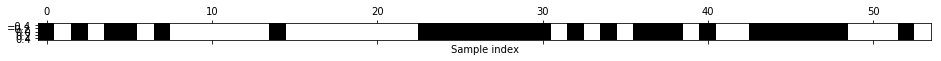

In [43]:
from sklearn.feature_selection import SelectFromModel 
from sklearn.ensemble import RandomForestClassifier 

select = SelectFromModel( RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l1.shape: {}".format(X_train_l1.shape))
mask = select.get_support()
# visualize the mask -- black is True, white is False 
plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
plt.xlabel("Sample index")

X_test_l1 = select.transform(X_test) 
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

##### Without feature selection Decision tree

In [44]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(train[['id', 'ccf', 'age', 'sex', 'cp', 'trestbp', 'htn', 'chol', 'cigs',
       'years', 'fbs', 'dm', 'famhist', 'restecg', 'ekgmo', 'ekgday', 'ekgyr',
       'dig', 'prop', 'nitr', 'pro', 'diuretic', 'proto', 'thaldur',
       'thaltime', 'met', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd',
       'dummy', 'trestbpd', 'exang', 'xhypo', 'oldpeak', 'slope', 'rldv5e',
       'ca', 'thal', 'cmo', 'cday', 'cyr', 'lmt', 'ladprox', 'laddist',
       'cxmain', 'om1', 'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4',
       'lvf']], train['num'])
predictions_dt = dt.predict(test[['id', 'ccf', 'age', 'sex', 'cp', 'trestbp', 'htn', 'chol', 'cigs',
       'years', 'fbs', 'dm', 'famhist', 'restecg', 'ekgmo', 'ekgday', 'ekgyr',
       'dig', 'prop', 'nitr', 'pro', 'diuretic', 'proto', 'thaldur',
       'thaltime', 'met', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd',
       'dummy', 'trestbpd', 'exang', 'xhypo', 'oldpeak', 'slope', 'rldv5e',
       'ca', 'thal', 'cmo', 'cday', 'cyr', 'lmt', 'ladprox', 'laddist',
       'cxmain', 'om1', 'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4',
       'lvf']])
predictright = 0
predictions_dt.shape[0]
for i in range(0,predictions_dt.shape[0]-1):
    if (predictions_dt[i]== test.iloc[i][10]):
        predictright +=1
accuracy = predictright/predictions_dt.shape[0]
accuracy

0.5789473684210527

##### After iterative feature selection Random forest tree give much better result

Test score: 0.887


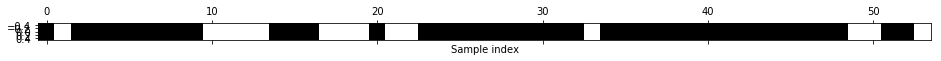

In [45]:
from sklearn.feature_selection import RFE 
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train) 
# visualize the selected features: 
mask = select.get_support() 
plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
plt.xlabel("Sample index")

X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

In [46]:
###Knn without feature selection
heartDiseaseKnn = KNeighborsClassifier(n_neighbors=10)
heartDiseaseKnn.fit(training_set, class_set['num'])
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
# We predict the class for our training set
predictionsTrain = heartDiseaseKnn.predict(training_set) 

# Here we create a matrix comparing the actual values vs. the predicted values
print(pd.crosstab(predictionsTrain, class_set['num'], 
                  rownames=['Predicted Values'], colnames=['Actual Values']))

# Measure the accuracy based on the trianing set
accuracyTrain = heartDiseaseKnn.score(training_set, class_set['num'])

print("Here is our accuracy for our training set:")
print('%.3f' % (accuracyTrain * 100), '%')

Actual Values      0   1
Predicted Values        
0                 80  41
1                  4  16
Here is our accuracy for our training set:
68.085 %
